# IMPORT PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
%matplotlib inline

# LOADING DATA

In [2]:
#DataSet de Train
data_train = pd.read_csv('hp_train.csv', index_col='Id')

#DataSet a predecir columna SalePice
data_test = pd.read_csv('hp_test.csv', index_col='Id')

In [3]:
#This code allows the tables to shown all values
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
data_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [6]:
#Con esta linea identifico las Columnas con valores NaN y cuantos valores NaN tiene cada una.
##Lo Googlee
data_train[data_train.columns[data_train.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
#Este codigo lo robe de: https://www.kaggle.com/code/giacomocavalca/house-prices-basic-analysis-eda-xgboost
def percentageOfnull(df):
    nan_count = df.isna().sum().sort_values(ascending=False)
    nan_percentage = ((df.isna().sum()/df.isna().count())*100).sort_values(ascending=False)
    df_dtype = df.dtypes
    df_info = pd.concat([nan_count,nan_percentage,df_dtype],axis=1,keys=['Null Count','Null Percentage','DataTypes'])
    return df_info[df_info['Null Count']>0]

In [8]:
percentageOfnull(data_train)

,Null Count,Null Percentage,DataTypes
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageType,81,5.547945,object
GarageCond,81,5.547945,object
GarageFinish,81,5.547945,object
GarageQual,81,5.547945,object


In [9]:
percentageOfnull(data_test)

,Null Count,Null Percentage,DataTypes
PoolQC,1456,99.794380,object
MiscFeature,1408,96.504455,object
Alley,1352,92.666210,object
Fence,1169,80.123372,object
FireplaceQu,730,50.034270,object
LotFrontage,227,15.558602,float64
GarageCond,78,5.346127,object
GarageFinish,78,5.346127,object
GarageYrBlt,78,5.346127,float64
GarageQual,78,5.346127,object


# Necesito ver analizar las variables con valores nulos. 
Si puedo los reemplazo con ceros.
Si no es posible, analizo como se relacionan con la variable a predecir.

In [10]:
#Genero una lista con las features que poseen valores nulos de data_train
train_features_with_null = data_train[data_train.columns[data_train.isnull().any()]].isnull().columns
train_features_with_null

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [11]:
data_train[train_features_with_null].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

A simple vista en base a las features con valores nulos, las que tiene mas distintos valores son:
    LotFrontage
    MasVnrArea
    GarageYrBlt

Las 2 primeras columnas tienen valores numericos/float que expresan una unidad de medida.
La feature GarageYrBlt tiene valores numericos pero se pueden considerar categorical ya que son años que indican la antiguedad del garage

# **DEAL WITH NULL VALUES IN DATA_TRAIN**

def reeplace_null_with_NA(df, columns):
    for i in columns:
         df[i].fillna('NA',inplace=True)


In [43]:
#reeplace_null_with_NA(data_train, ['Alley','MiscFeature','Fence'])

In [10]:
#Reemplazo los valores nulls de 'Alley', 'MiscFeature' con N/A.
data_train['Alley'].fillna('NA', inplace=True)
data_train['MiscFeature'].fillna('NA', inplace=True)
data_train['Fence'].fillna('NA', inplace=True)

In [11]:
#Todas los registros con 'PoolQC' vacio, se relacionan a una casa con pileta de area 0. Por ende reemplazo los valores de 'PoolQC' null con 'N/A'
data_train[data_train['PoolQC'].isnull()]['PoolArea'].value_counts()
data_train['PoolQC'].fillna('NA', inplace=True)


In [12]:
#Todas los registros con 'FireplaceQu' vacio, se relacionan a una casa sin Fireplaces. Por ende reemplazo los valores de 'FireplaceQu' null con 'N/A'
data_train[data_train['FireplaceQu'].isnull()]['Fireplaces'].value_counts()
data_train['FireplaceQu'].fillna('NA', inplace=True)

In [13]:
#Valido que las features relacionadas a Garage, sean las que el 'GarageArea' es igual a 0

print(data_train[data_train['GarageArea'] == 0]['GarageType'].value_counts())
print(data_train[data_train['GarageType'].isnull()]['GarageArea'].value_counts())

print(data_train[data_train['GarageArea'] == 0]['GarageCond'].value_counts())
print(data_train[data_train['GarageCond'].isnull()]['GarageArea'].value_counts())

print(data_train[data_train['GarageArea'] == 0]['GarageFinish'].value_counts())
print(data_train[data_train['GarageFinish'].isnull()]['GarageArea'].value_counts())

print(data_train[data_train['GarageArea'] == 0]['GarageQual'].value_counts())
print(data_train[data_train['GarageQual'].isnull()]['GarageArea'].value_counts())

print(data_train[data_train['GarageArea'] == 0]['GarageYrBlt'].value_counts())
print(data_train[data_train['GarageQual'].isnull()]['GarageArea'].value_counts())

Series([], Name: GarageType, dtype: int64)
0    81
Name: GarageArea, dtype: int64
Series([], Name: GarageCond, dtype: int64)
0    81
Name: GarageArea, dtype: int64
Series([], Name: GarageFinish, dtype: int64)
0    81
Name: GarageArea, dtype: int64
Series([], Name: GarageQual, dtype: int64)
0    81
Name: GarageArea, dtype: int64
Series([], Name: GarageYrBlt, dtype: int64)
0    81
Name: GarageArea, dtype: int64


In [14]:
data_train['GarageYrBlt'].fillna(0, inplace=True)
data_train['GarageQual'].fillna("NA", inplace=True)
data_train['GarageFinish'].fillna("NA", inplace=True)
data_train['GarageCond'].fillna("NA", inplace=True)
data_train['GarageType'].fillna("NA", inplace=True)

In [15]:
#Valido que las features relacionadas a Basement, sean las que el 'TotalBsmtSF' es igual a 0

#Hay un valor de TotalBsmtSF que es distinto de 0, el cual BsmtFinType2 es Null. Voy a asignarle a dicho valor un 'Unf' en vez de 'NA'
i = data_train[data_train['TotalBsmtSF'] == 3206].index

#Este codigo a veces funciona y otra veces no
#data_train.loc[i,'BsmtFinType2'].replace(np.nan,'Unf',inplace = True)
data_train.loc[i,'BsmtFinType2'] = 'Unf'

In [16]:
data_train['BsmtFinType2'].fillna('NA',inplace=True)

In [17]:
data_train['BsmtFinType2'].value_counts()

Unf    1257
Rec      54
LwQ      46
NA       37
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [18]:
data_train[data_train['TotalBsmtSF'] == 0]['BsmtExposure']
print(data_train[data_train['BsmtExposure'].isna()]['TotalBsmtSF'].value_counts())
i = data_train[data_train['TotalBsmtSF'] == 936].index

#Hay un valor de TotalBsmtSF que es distinto de 0, el cual BsmtExposure es Null. Voy a asignarle a dicho valor un 'No' en vez de 'NA'
#Este codigo a veces funciona y otra veces no
#data_train.loc[i,'BsmtExposure'].replace(np.nan,'No',inplace = True)
data_train.loc[i,'BsmtExposure'] = 'No'

0      37
936     1
Name: TotalBsmtSF, dtype: int64


In [19]:
data_train['BsmtExposure'].fillna('NA',inplace=True)

In [20]:
print(data_train[data_train['TotalBsmtSF'] == 0]['BsmtCond'].value_counts())
print(data_train[data_train['BsmtCond'].isnull()]['TotalBsmtSF'].value_counts())


print(data_train[data_train['TotalBsmtSF'] == 0]['BsmtFinType1'].value_counts())
print(data_train[data_train['BsmtFinType1'].isnull()]['TotalBsmtSF'].value_counts())


print(data_train[data_train['TotalBsmtSF'] == 0]['BsmtQual'].value_counts())
print(data_train[data_train['BsmtQual'].isnull()]['TotalBsmtSF'].value_counts())

Series([], Name: BsmtCond, dtype: int64)
0    37
Name: TotalBsmtSF, dtype: int64
Series([], Name: BsmtFinType1, dtype: int64)
0    37
Name: TotalBsmtSF, dtype: int64
Series([], Name: BsmtQual, dtype: int64)
0    37
Name: TotalBsmtSF, dtype: int64


In [21]:
data_train['BsmtCond'].fillna('NA',inplace=True)
data_train['BsmtFinType1'].fillna('NA',inplace=True)
data_train['BsmtQual'].fillna('NA',inplace=True)

In [22]:
percentageOfnull(data_train)

,Null Count,Null Percentage,DataTypes
LotFrontage,259,17.739726,float64
MasVnrType,8,0.547945,object
MasVnrArea,8,0.547945,float64
Electrical,1,0.068493,object


In [23]:
print(data_train[data_train['MasVnrType'].isnull()]['MasVnrArea'].value_counts())
print(data_train[data_train['MasVnrArea'] == 0]['MasVnrType'].value_counts())

Series([], Name: MasVnrArea, dtype: int64)
None       859
BrkFace      1
Stone        1
Name: MasVnrType, dtype: int64


In [24]:
data_train['MasVnrType'].fillna('None',inplace=True)
data_train['MasVnrArea'].fillna(0,inplace=True)

In [25]:
#Electrical le asigno un valor para reemplazar el valor null.
data_train['Electrical'].fillna('SBrkr',inplace=True)

In [26]:
#LotFrontage
data_train['LotFrontage'].fillna(data_train['LotFrontage'].median(), inplace=True)

In [27]:
data_train.shape

(1460, 80)

In [28]:
percentageOfnull(data_train)

,Null Count,Null Percentage,DataTypes


# **DEAL WITH NULL VALUES IN DATA_TEST**

In [29]:
percentageOfnull(data_test)

,Null Count,Null Percentage,DataTypes
PoolQC,1456,99.794380,object
MiscFeature,1408,96.504455,object
Alley,1352,92.666210,object
Fence,1169,80.123372,object
FireplaceQu,730,50.034270,object
LotFrontage,227,15.558602,float64
GarageCond,78,5.346127,object
GarageFinish,78,5.346127,object
GarageYrBlt,78,5.346127,float64
GarageQual,78,5.346127,object


In [30]:
#NO Todas los registros con 'PoolQC' vacio, se relacionan a una casa con pileta de area 0. Por ende reemplazo los valores de 'PoolQC' null con 'N/A'
data_test[data_test['PoolQC'].isnull()]['PoolArea'].value_counts()
#data_test[data_test[data_test['PoolQC'].isnull()]['PoolArea'] > 0]
i = data_test[(data_test['PoolQC'].isnull()) & (data_test['PoolArea']  > 0)].index
#A los 3 registros con 'PoolQC' null pero que tiene pileta la casa, les asigno valor de 'TA'
data_test.loc[i,'PoolQC'] = 'TA'

data_test['PoolQC'].fillna('NA', inplace=True)

In [31]:
#Reemplazo los valores nulls de 'Alley', 'MiscFeature' con N/A.
data_test['Alley'].fillna('NA', inplace=True)
data_test['MiscFeature'].fillna('NA', inplace=True)
data_test['Fence'].fillna('NA', inplace=True)

In [32]:
#Valido que las features relacionadas a Garage, sean las que el 'GarageArea' es igual a 0

print(data_test[data_test['GarageArea'] == 0]['GarageType'].value_counts())
print(data_test[data_test['GarageType'].isnull()]['GarageArea'].value_counts())
print(data_test[(data_test['GarageType'].isnull()) & (data_test['GarageArea']  > 0)].index)

print(data_test[data_test['GarageArea'] == 0]['GarageCond'].value_counts())
print(data_test[data_test['GarageCond'].isnull()]['GarageArea'].value_counts())
print(data_test[(data_test['GarageCond'].isnull()) & (data_test['GarageArea']  > 0)].index)

print(data_test[data_test['GarageArea'] == 0]['GarageFinish'].value_counts())
print(data_test[data_test['GarageFinish'].isnull()]['GarageArea'].value_counts())
print(data_test[(data_test['GarageFinish'].isnull()) & (data_test['GarageArea']  > 0)].index)

print(data_test[data_test['GarageArea'] == 0]['GarageQual'].value_counts())
print(data_test[data_test['GarageQual'].isnull()]['GarageArea'].value_counts())
print(data_test[(data_test['GarageQual'].isnull()) & (data_test['GarageArea']  > 0)].index)

print(data_test[data_test['GarageArea'] == 0]['GarageYrBlt'].value_counts())
print(data_test[data_test['GarageYrBlt'].isnull()]['GarageArea'].value_counts())
print(data_test[(data_test['GarageYrBlt'].isnull()) & (data_test['GarageArea']  > 0)].index)

i = data_test[(data_test['GarageCond'].isnull()) & (data_test['GarageArea']  > 0)].index

data_test.loc[i,'GarageCond'] = 'TA'
data_test.loc[i,'GarageFinish'] = 'RFn'
data_test.loc[i,'GarageQual'] = 'TA'
data_test.loc[i,'GarageYrBlt'] = data_test['GarageYrBlt'].median()



data_test['GarageType'].fillna('NA', inplace=True)
data_test['GarageCond'].fillna('NA', inplace=True)
data_test['GarageFinish'].fillna('NA', inplace=True)
data_test['GarageQual'].fillna('NA', inplace=True)
data_test['GarageYrBlt'].fillna(0, inplace=True)

Series([], Name: GarageType, dtype: int64)
0.0    76
Name: GarageArea, dtype: int64
Int64Index([], dtype='int64', name='Id')
Series([], Name: GarageCond, dtype: int64)
0.0      76
360.0     1
Name: GarageArea, dtype: int64
Int64Index([2127], dtype='int64', name='Id')
Series([], Name: GarageFinish, dtype: int64)
0.0      76
360.0     1
Name: GarageArea, dtype: int64
Int64Index([2127], dtype='int64', name='Id')
Series([], Name: GarageQual, dtype: int64)
0.0      76
360.0     1
Name: GarageArea, dtype: int64
Int64Index([2127], dtype='int64', name='Id')
Series([], Name: GarageYrBlt, dtype: int64)
0.0      76
360.0     1
Name: GarageArea, dtype: int64
Int64Index([2127], dtype='int64', name='Id')


In [33]:
#Todas los registros con 'FireplaceQu' vacio, se relacionan a una casa sin Fireplaces. Por ende reemplazo los valores de 'FireplaceQu' null con 'N/A'
data_test[data_test['FireplaceQu'].isnull()]['Fireplaces'].value_counts()
data_test['FireplaceQu'].fillna('NA', inplace=True)

In [34]:
#BASEMENT
print(data_test[data_test['TotalBsmtSF'] == 0]['BsmtCond'].value_counts())
print(data_test[data_test['BsmtCond'].isnull()]['TotalBsmtSF'].value_counts())
print(data_test[(data_test['BsmtCond'].isnull()) & (data_test['TotalBsmtSF']  > 0)].index)
print('\n')
i_cond = data_test[(data_test['BsmtCond'].isnull()) & (data_test['TotalBsmtSF']  > 0)].index
data_test.loc[i_cond,'BsmtCond'] = 'TA'
data_test['BsmtCond'].fillna('NA', inplace=True)


print(data_test[data_test['TotalBsmtSF'] == 0]['BsmtQual'].value_counts())
print(data_test[data_test['BsmtQual'].isnull()]['TotalBsmtSF'].value_counts())
print(data_test[(data_test['BsmtQual'].isnull()) & (data_test['TotalBsmtSF']  > 0)].index)
print('\n')
i_qual = data_test[(data_test['BsmtQual'].isnull()) & (data_test['TotalBsmtSF']  > 0)].index
data_test.loc[i_qual,'BsmtQual'] = 'TA'
data_test['BsmtQual'].fillna('NA', inplace=True)


print(data_test[data_test['TotalBsmtSF'] == 0]['BsmtExposure'].value_counts())
print(data_test[data_test['BsmtExposure'].isnull()]['TotalBsmtSF'].value_counts())
print(data_test[(data_test['BsmtExposure'].isnull()) & (data_test['TotalBsmtSF']  > 0)].index)
print('\n')
i_exp = data_test[(data_test['BsmtExposure'].isnull()) & (data_test['TotalBsmtSF']  > 0)].index
data_test.loc[i_exp,'BsmtExposure'] = 'Av'
data_test['BsmtExposure'].fillna('NA', inplace=True)


print(data_test[data_test['TotalBsmtSF'] == 0]['BsmtFinType2'].value_counts())
print(data_test[data_test['BsmtFinType2'].isnull()]['TotalBsmtSF'].value_counts())
print(data_test[(data_test['BsmtFinType2'].isnull()) & (data_test['TotalBsmtSF']  > 0)].index)
data_test['BsmtFinType2'].fillna('NA', inplace=True)
print('\n')

print(data_test[data_test['TotalBsmtSF'] == 0]['BsmtFinType1'].value_counts())
print(data_test[data_test['BsmtFinType1'].isnull()]['TotalBsmtSF'].value_counts())
print(data_test[(data_test['BsmtFinType1'].isnull()) & (data_test['TotalBsmtSF']  > 0)].index)
data_test['BsmtFinType1'].fillna('NA', inplace=True)

Series([], Name: BsmtCond, dtype: int64)
0.0       41
995.0      1
1127.0     1
1426.0     1
Name: TotalBsmtSF, dtype: int64
Int64Index([2041, 2186, 2525], dtype='int64', name='Id')


Series([], Name: BsmtQual, dtype: int64)
0.0      41
356.0     1
173.0     1
Name: TotalBsmtSF, dtype: int64
Int64Index([2218, 2219], dtype='int64', name='Id')


Series([], Name: BsmtExposure, dtype: int64)
0.0       41
725.0      1
1595.0     1
Name: TotalBsmtSF, dtype: int64
Int64Index([1488, 2349], dtype='int64', name='Id')


Series([], Name: BsmtFinType2, dtype: int64)
0.0    41
Name: TotalBsmtSF, dtype: int64
Int64Index([], dtype='int64', name='Id')


Series([], Name: BsmtFinType1, dtype: int64)
0.0    41
Name: TotalBsmtSF, dtype: int64
Int64Index([], dtype='int64', name='Id')


In [35]:
percentageOfnull(data_test)

,Null Count,Null Percentage,DataTypes
LotFrontage,227,15.558602,float64
MasVnrType,16,1.096642,object
MasVnrArea,15,1.028101,float64
MSZoning,4,0.274160,object
Functional,2,0.137080,object
BsmtFullBath,2,0.137080,float64
Utilities,2,0.137080,object
BsmtHalfBath,2,0.137080,float64
Exterior1st,1,0.068540,object
BsmtFinSF1,1,0.068540,float64


In [36]:
print(data_test[data_test['MasVnrType'].isnull()]['MasVnrArea'].value_counts())
print(data_test[data_test['MasVnrArea'] == 0]['MasVnrType'].value_counts())

i = data_test[(data_test['MasVnrType'].isnull()) & (data_test['MasVnrArea']  > 0)].index


data_test.loc[i,'MasVnrType'] = 'BrkCmn'
data_test['MasVnrType'].fillna('NA', inplace=True)
data_test['MasVnrArea'].fillna(0, inplace=True)

198.0    1
Name: MasVnrArea, dtype: int64
None       876
BrkFace      1
Name: MasVnrType, dtype: int64


RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


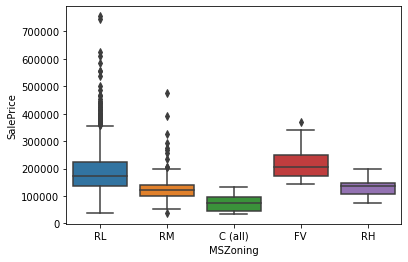

In [37]:
sns.boxplot(data=data_train, x='MSZoning', y='SalePrice')

print(data_test['MSZoning'].value_counts())

In [38]:
phik_overview = data_train[['SalePrice','MSZoning']].phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['SalePrice']


,SalePrice,MSZoning
SalePrice,1.00,0.45
MSZoning,0.45,1.00


In [39]:
#Asigno valor random a los 4 registros de MSZoning con valor Null.
data_test['MSZoning'].fillna('RL', inplace = True)

In [40]:
data_test['Functional'].value_counts()
data_test['Functional'].fillna('Typ',inplace = True)

In [41]:
data_test['TotalBsmtSF'].fillna(0,inplace = True)

print(data_test[data_test['TotalBsmtSF'] == 0]['BsmtHalfBath'].value_counts())
print(data_test[data_test['BsmtHalfBath'].isnull()]['TotalBsmtSF'].value_counts())
data_test['BsmtHalfBath'].fillna(0,inplace = True)


print(data_test[data_test['TotalBsmtSF'] == 0]['BsmtFullBath'].value_counts())
print(data_test[data_test['BsmtFullBath'].isnull()]['TotalBsmtSF'].value_counts())
data_test['BsmtFullBath'].fillna(0,inplace = True)

print(data_test[data_test['TotalBsmtSF'] == 0]['BsmtFinSF2'].value_counts())
print(data_test[data_test['BsmtFinSF2'].isnull()]['TotalBsmtSF'].value_counts())
data_test['BsmtFinSF2'].fillna(0,inplace = True)

print(data_test[data_test['TotalBsmtSF'] == 0]['BsmtFinSF1'].value_counts())
print(data_test[data_test['BsmtFinSF1'].isnull()]['TotalBsmtSF'].value_counts())
data_test['BsmtFinSF1'].fillna(0,inplace = True)

print(data_test[data_test['TotalBsmtSF'] == 0]['BsmtUnfSF'].value_counts())
print(data_test[data_test['BsmtUnfSF'].isnull()]['TotalBsmtSF'].value_counts())
data_test['BsmtUnfSF'].fillna(0,inplace = True)

0.0    40
Name: BsmtHalfBath, dtype: int64
0.0    2
Name: TotalBsmtSF, dtype: int64
0.0    40
Name: BsmtFullBath, dtype: int64
0.0    2
Name: TotalBsmtSF, dtype: int64
0.0    41
Name: BsmtFinSF2, dtype: int64
0.0    1
Name: TotalBsmtSF, dtype: int64
0.0    41
Name: BsmtFinSF1, dtype: int64
0.0    1
Name: TotalBsmtSF, dtype: int64
0.0    41
Name: BsmtUnfSF, dtype: int64
0.0    1
Name: TotalBsmtSF, dtype: int64


In [42]:
percentageOfnull(data_test)

,Null Count,Null Percentage,DataTypes
LotFrontage,227,15.558602,float64
Utilities,2,0.137080,object
SaleType,1,0.068540,object
Exterior1st,1,0.068540,object
KitchenQual,1,0.068540,object
GarageCars,1,0.068540,float64
GarageArea,1,0.068540,float64
Exterior2nd,1,0.068540,object


In [43]:
print(data_test[data_test['GarageArea'].isnull()]['GarageCars'].value_counts())
print(data_test[data_test['GarageCars'].isnull()]['GarageArea'].value_counts())

data_test['GarageArea'].fillna(0,inplace = True)
data_test['GarageCars'].fillna(0,inplace = True)

Series([], Name: GarageCars, dtype: int64)
Series([], Name: GarageArea, dtype: int64)


In [44]:
print(data_test[data_test['Exterior1st'].isnull()]['Exterior2nd'].value_counts())
print(data_test[data_test['Exterior2nd'].isnull()]['Exterior1st'].value_counts())

i = data_test[(data_test['Exterior2nd'].isnull())].index
print(i)
print(data_test.loc[i,'RoofMatl'])

Series([], Name: Exterior2nd, dtype: int64)
Series([], Name: Exterior1st, dtype: int64)
Int64Index([2152], dtype='int64', name='Id')
Id
2152    Tar&Grv
Name: RoofMatl, dtype: object


In [45]:
print(data_test[data_test['RoofMatl'] == 'Tar&Grv']['Exterior1st'].value_counts())
print(data_test[data_test['RoofMatl'] == 'Tar&Grv']['Exterior2nd'].value_counts())

Plywood    7
WdShing    1
HdBoard    1
Wd Sdng    1
VinylSd    1
Name: Exterior1st, dtype: int64
Plywood    5
Wd Shng    2
CBlock     1
Wd Sdng    1
HdBoard    1
VinylSd    1
Name: Exterior2nd, dtype: int64


In [46]:
data_test['Exterior1st'].fillna('Plywood',inplace = True)
data_test['Exterior2nd'].fillna('Plywood',inplace = True)

In [47]:
data_test['Utilities'].value_counts()
data_test['Utilities'].fillna('AllPub',inplace = True)

In [48]:
data_test['KitchenQual'].fillna('TA',inplace = True)

WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
Con         3
ConLw       3
Name: SaleType, dtype: int64


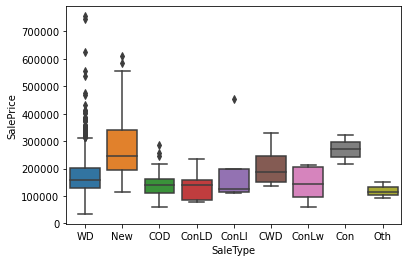

In [49]:
print(data_test['SaleType'].value_counts())
sns.boxplot(data=data_train, x='SaleType', y='SalePrice')

In [50]:
phik_overview = data_train[['SalePrice','SaleType']].phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['SalePrice']


,SalePrice,SaleType
SalePrice,1.00,0.27
SaleType,0.27,1.00


In [51]:
#Al no haber una correlacion alta entre 'SaleType' y 'SalePrice' asigno el valor Null con uno valor random de SaleType
data_test['SaleType'].fillna('WD', inplace = True)

In [52]:
#LotFrontage
data_test['LotFrontage'].fillna(data_test['LotFrontage'].median(), inplace=True)

In [53]:
percentageOfnull(data_test)

,Null Count,Null Percentage,DataTypes


**Save both datasets**

In [54]:
data_test.shape

(1459, 79)

In [55]:
data_train.to_csv('data_train_nonull.csv')
data_test.to_csv('data_test_nonull.csv')

# FEATURING ENGINEERING

In [2]:
data_train = pd.read_csv('data_train_nonull.csv', index_col='Id')
data_test = pd.read_csv('data_test_nonull.csv', index_col='Id')

In [56]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [57]:
phik_overview = data_train.phik_matrix()
col = phik_overview[phik_overview.round(2) < 0.3]['SalePrice']

interval columns not set, guessing: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [58]:
col.dropna(inplace = True)

In [59]:
print(col.index)
print(col.shape)

Index(['LotArea', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'ExterCond', 'BsmtFinType2', 'BsmtFinSF2',
       'Heating', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'EnclosedPorch',
       '3SsnPorch', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType'],
      dtype='object')
(31,)


In [60]:
print(data_train.shape)
print(data_test.shape)

(1460, 80)
(1459, 79)


In [61]:
data_train = data_train.drop(columns=col.index)
data_test = data_test.drop(columns=col.index) 

In [62]:
print(data_train.shape)
print(data_test.shape)

(1460, 49)
(1459, 48)


In [63]:
data_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [64]:
data_train_X = data_train.drop(columns='SalePrice')
data_train_y = data_train['SalePrice']

# ONE HOT ENCODING - sklearn

In [64]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
train_objects = data_train_X.select_dtypes(include='object').columns
test_objects = data_test.select_dtypes(include='object').columns

In [67]:
onehotencoder=OneHotEncoder(handle_unknown='ignore')

In [68]:
enc_data_train = onehotencoder.fit_transform(data_train_X[train_objects]).toarray()

In [80]:
enc_data_train = onehotencoder.fit_transform(data_train_X[train_objects])

KeyError: "None of [Index(['MSZoning', 'LotShape', 'Neighborhood', 'Exterior1st', 'Exterior2nd',\n       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond',\n       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical',\n       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',\n       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'SaleCondition'],\n      dtype='object')] are in the [columns]"

In [79]:
enc_data_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [73]:
data_train_X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'SaleCondition'],
      dtype='object')

In [77]:
data_train_X.drop(columns=train_objects, axis = 1, inplace=True)

In [78]:
X_train=data_train_X.join(enc_data_train)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

# ONE HOT ENCODING - get_dummies

In [65]:
train_objects = data_train_X.select_dtypes(include='object').columns
test_objects = data_test.select_dtypes(include='object').columns

In [66]:
print(len(train_objects))
print(len(test_objects))

24
24


In [67]:
final_data_train_X = pd.get_dummies(data_train_X,columns=train_objects,drop_first=True)
final_data_test = pd.get_dummies(data_test,columns=test_objects,drop_first=True)

In [68]:
print(final_data_train_X.shape)
print(final_data_test.shape)

(1460, 159)
(1459, 155)


Basically, the number of categories in the training set is much larger than the categories in the test set, because of which there is a difference in the number of columns in the test and training set after OneHotEncoding. How can I handle this problem?

In [69]:
train_X, left = final_data_train_X.align(final_data_test, join="outer", axis=1)

In [95]:
#final_data_test.head()

In [70]:
print(train_X.shape)
print(left.shape)

(1460, 161)
(1459, 161)


In [71]:
percentageOfnull(train_X)
train_X.fillna(0,inplace = True)

In [72]:
percentageOfnull(left)
left.fillna(0,inplace = True)

**ONE HOT ENCODING**

Probar ONEHOTENCODING de sklearn.
https://stackoverflow.com/questions/47786637/how-to-handle-category-mismatch-after-onehotencoding-from-test-data-while-predic

https://datascience.stackexchange.com/questions/92363/different-number-of-features-in-train-vs-test-when-using-label-encoding

# PRUEBA RANDOMFOREST

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [75]:
clf = RandomForestRegressor(n_estimators=50, max_depth=3)

In [76]:
params = {
'n_estimators': [20,30,40,50,60,80,100],
'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12]
    }

If you pass True to the value of refit parameter of GridSearchCV (which is the default value anyway), then the estimator with best parameters refits on the whole dataset, so you can use gs.fit(X_test) for prediction. If the value of refit is equal to False while fitting the GridSearchCV object on your training set, then for prediction, you have only one option which is using gs.best_estimator_.predict(X_test).

In [77]:
grid = GridSearchCV(clf, params, cv=5, scoring = 'neg_mean_absolute_error')
#scoring='neg_mean_squared_error'

In [73]:
#final_data_train.iloc[: , :-1]

In [78]:
#¿Bajo que funcion perdida optimiza¿
grid.fit(train_X, data_train_y)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=3, n_estimators=50),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'n_estimators': [20, 30, 40, 50, 60, 80, 100]},
             scoring='neg_mean_absolute_error')

In [79]:
grid.best_score_

-17688.238325681945

In [80]:
grid.best_params_

{'max_depth': 12, 'n_estimators': 50}

In [81]:
rf_pred = grid.predict(left)

# XGBoost

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

In [83]:
xgb = GradientBoostingRegressor(learning_rate=0.2, n_estimators=30, max_depth=5, subsample=0.8)

In [84]:
params = {
'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.3],
'n_estimators': [30,50,60,80,100],
'max_depth': [3,4,5,6,7,8,9,10]
    }

In [85]:
grid_2 = GridSearchCV(xgb, params, cv=5, scoring = 'neg_mean_absolute_error')

In [86]:
grid_2.fit(train_X, data_train_y)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.2, max_depth=5,
                                                 n_estimators=30,
                                                 subsample=0.8),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [30, 50, 60, 80, 100]},
             scoring='neg_mean_absolute_error')

In [87]:
grid_2.best_score_

-15938.89194116139

In [88]:
grid_2.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 80}

In [89]:
xgb_pred = grid_2.predict(left)

In [90]:
print(xgb_pred[1], rf_pred[1])

149965.30424326548 151832.42705580787


# FEATURE SCALING

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [93]:
train_X_scaled = scaler.fit_transform(train_X)

In [94]:
left_scaled = scaler.transform(left)

# SVM REGRESSOR

In [95]:
from sklearn.svm import SVR

In [96]:
svr = SVR()

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
#CONSULTAR A MATIAS POR FUNCION PERDIDA DE SVR PARA PODER COMPARAR SVR CON RANDOMFOREST Y XGBOOST
cross_val_score(svr, train_X_scaled, data_train_y, scoring = 'neg_mean_absolute_error')

array([-55148.80582594, -59536.30361768, -57914.65063456, -49654.89915614,
       -55286.3892475 ])

# DNN

link: https://www.kaggle.com/code/aaryandhore/neural-network-gridsearchcv-explanations/notebook

In [99]:
from keras.models import Sequential
from keras.layers import Dense

In [100]:
classifier = Sequential()

In [101]:
print(left_scaled.shape, train_X_scaled.shape)

(1459, 161) (1460, 161)


In [102]:
def buildModel(optimizer):
    # Initialising the ANN
    classifier = Sequential()
    
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 161, activation = 'relu'))
    
    # Adding the second hidden layer
    classifier.add(Dense(units = 64, activation = 'relu'))
    
    
    classifier.add(Dense(units = 32, activation = 'relu'))
    
    # Adding the output layer
    classifier.add(Dense(units = 1, activation = 'linear'))
    
    # Compiling the ANN
    classifier.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    
    return classifier

In [103]:
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

classifier = KerasRegressor(build_fn = buildModel)
#What hyperparameter we want to play with
parameters = {'batch_size': [16, 32, 64, 128],
              'epochs': [100, 150],
              'optimizer': ['adam', 'rmsprop']}
grid_search_rnn = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5)

<ipython-input-103-33c32b869468>:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasRegressor(build_fn = buildModel)


In [104]:
grid_search_rnn.fit(train_X_scaled, data_train_y, verbose = 0)

3/3 [==============================] - 0s 4ms/step


GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000002522670DFD0>,
             param_grid={'batch_size': [16, 32, 64, 128], 'epochs': [100, 150],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='neg_mean_absolute_error')

In [105]:
grid_search_rnn.best_score_

-16497.973402718322

In [106]:
grid_search_rnn.best_params_

{'batch_size': 16, 'epochs': 150, 'optimizer': 'adam'}

In [107]:
plt.plot(grid_search_rnn.history['neg_mean_absolute_error'], label='GridSearchCV Best Parameters')

AttributeError: 'GridSearchCV' object has no attribute 'history'

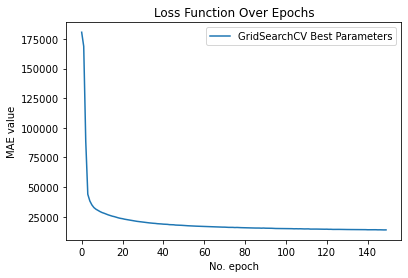

In [109]:
bestClassifier = buildModel('adam')
HistoryBest = bestClassifier.fit(x = train_X_scaled, y = data_train_y, batch_size = 16, epochs =150 , verbose = 0)
plt.plot(HistoryBest.history['mean_absolute_error'], label='GridSearchCV Best Parameters')
plt.title('Loss Function Over Epochs')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

Intentar aplicar Gradio o Streamlit para hacer algo de Front en este modelo. 06/03/2023